<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import xarray
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 
from netCDF4 import Dataset
import numpy as np
import netCDF4 as netcdf
import pandas as pd
import octant.roms 
import glob
import cartopy
import cartopy.crs as ccrs  # commonly used shorthand
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import calendar
%matplotlib inline

In [3]:
ncfiles_all = ['/d2/copano_bay/2010_n/jan_2010/output_jan_2010.nc',
           '/d2/copano_bay/2010_n/feb_2010/output_feb_2010.nc',
           '/d2/copano_bay/2010_n/march_2010/output_march_2010.nc',
           '/d2/copano_bay/2010_n/april_2010/output_april_2010.nc',
           '/d2/copano_bay/2010_n/may_2010/output_may_2010.nc',
           '/d2/copano_bay/2010_n/june_2010/output_june_2010.nc',
           '/d2/copano_bay/2010_n/july_2010/output_july_2010.nc',
           '/d2/copano_bay/2010_n/aug_2010/output_aug_2010.nc',
           '/d2/copano_bay/2010_n/sep_2010/output_sep_2010.nc',
           '/d2/copano_bay/2010_n/oct_2010/output_oct_2010.nc',
           '/d2/copano_bay/2010_n/nov_2010/output_nov_2010.nc',
           '/d2/copano_bay/2010_n/dec_2010/output_dec_2010.nc',
           '/d2/copano_bay/2011_n/jan_2011/output_jan_2011.nc',
           '/d2/copano_bay/2011_n/feb_2011/output_feb_2011.nc',
           '/d2/copano_bay/2011_n/march_2011/output_march_2011.nc',
           '/d2/copano_bay/2011_n/april_2011/output_april_2011.nc',
           '/d2/copano_bay/2011_n/may_2011/output_may_2011.nc',
           '/d2/copano_bay/2011_n/june_2011/output_june_2011.nc',
           '/d2/copano_bay/2011_n/july_2011/output_july_2011.nc',
           '/d2/copano_bay/2011_n/aug_2011/output_aug_2011.nc',
           '/d2/copano_bay/2011_n/sep_2011/output_sep_2011.nc',
           '/d2/copano_bay/2011_n/oct_2011/output_oct_2011.nc',
           '/d2/copano_bay/2011_n/nov_2011/output_nov_2011.nc',
           '/d2/copano_bay/2011_n/dec_2011/output_dec_2011.nc',
           '/d2/copano_bay/2012_n/jan_2012/output_jan_2012.nc',
           '/d2/copano_bay/2012_n/feb_2012/output_feb_2012.nc',
           '/d2/copano_bay/2012_n/march_2012/output_march_2012.nc',
           '/d2/copano_bay/2012_n/april_2012/output_april_2012.nc',
           '/d2/copano_bay/2012_n/may_2012/output_may_2012.nc',
           '/d2/copano_bay/2012_n/june_2012/output_june_2012.nc',
           '/d2/copano_bay/2012_n/july_2012/output_july_2012.nc',
           '/d2/copano_bay/2012_n/aug_2012/output_aug_2012.nc',
           '/d2/copano_bay/2012_n/sep_2012/output_sep_2012.nc',
           '/d2/copano_bay/2012_n/oct_2012/output_oct_2012.nc',
           '/d2/copano_bay/2012_n/nov_2012/output_nov_2012.nc',
           '/d2/copano_bay/2012_n/dec_2012/output_dec_2012.nc',
           '/d2/copano_bay/2013_n/jan_2013/output_jan_2013.nc',
           '/d2/copano_bay/2013_n/feb_2013/output_feb_2013.nc',
           '/d2/copano_bay/2013_n/march_2013/output_march_2013.nc',
           '/d2/copano_bay/2013_n/april_2013/output_april_2013.nc',
           '/d2/copano_bay/2013_n/may_2013/output_may_2013.nc',
           '/d2/copano_bay/2013_n/june_2013/output_june_2013.nc',
           '/d2/copano_bay/2013_n/july_2013/output_july_2013.nc',
           '/d2/copano_bay/2013_n/aug_2013/output_aug_2013.nc',
           '/d2/copano_bay/2013_n/sep_2013/output_sep_2013.nc',
           '/d2/copano_bay/2013_n/oct_2013/output_oct_2013.nc',
           '/d2/copano_bay/2013_n/nov_2013/output_nov_2013.nc',
           '/d2/copano_bay/2013_n/dec_2013/output_dec_2013.nc',
           '/d2/copano_bay/2014_n/jan_2014/output_jan_2014.nc',
           '/d2/copano_bay/2014_n/feb_2014/output_feb_2014.nc',
           '/d2/copano_bay/2014_n/march_2014/output_march_2014.nc',
           '/d2/copano_bay/2014_n/april_2014/output_april_2014.nc',
           '/d2/copano_bay/2014_n/may_2014/output_may_2014.nc',
           '/d2/copano_bay/2014_n/june_2014/output_june_2014.nc',
           '/d2/copano_bay/2014_n/july_2014/output_july_2014.nc',
           '/d2/copano_bay/2014_n/aug_2014/output_aug_2014.nc',
           '/d2/copano_bay/2014_n/sep_2014/output_sep_2014.nc',
           '/d2/copano_bay/2014_n/oct_2014/output_oct_2014.nc',
           '/d2/copano_bay/2014_n/nov_2014/output_nov_2014.nc',
           '/d2/copano_bay/2014_n/dec_2014/output_dec_2014.nc',
           '/d2/copano_bay/2015_n/jan_2015/output_jan_2015.nc',
           '/d2/copano_bay/2015_n/feb_2015/output_feb_2015.nc',
           '/d2/copano_bay/2015_n/march_2015/output_march_2015.nc',
           '/d2/copano_bay/2015_n/april_2015/output_april_2015.nc',
           '/d2/copano_bay/2015_n/may_2015/output_may_2015.nc',
           '/d2/copano_bay/2015_n/june_2015/output_june_2015.nc',
           '/d2/copano_bay/2015_n/july_2015/output_july_2015.nc',
           '/d2/copano_bay/2015_n/aug_2015/output_aug_2015.nc',
           '/d2/copano_bay/2015_n/sep_2015/output_sep_2015.nc',
           '/d2/copano_bay/2015_n/oct_2015/output_oct_2015.nc',
           '/d2/copano_bay/2015_n/nov_2015/output_nov_2015.nc',
           '/d2/copano_bay/2015_n/dec_2015/output_dec_2015.nc',]

nc = netcdf.MFDataset(['/d2/copano_bay/2010_n/jan_2010/output_jan_2010.nc',
           '/d2/copano_bay/2010_n/feb_2010/output_feb_2010.nc',
           '/d2/copano_bay/2010_n/march_2010/output_march_2010.nc',
           '/d2/copano_bay/2010_n/april_2010/output_april_2010.nc',
           '/d2/copano_bay/2010_n/may_2010/output_may_2010.nc',
           '/d2/copano_bay/2010_n/june_2010/output_june_2010.nc',
           '/d2/copano_bay/2010_n/july_2010/output_july_2010.nc',
           '/d2/copano_bay/2010_n/aug_2010/output_aug_2010.nc',
           '/d2/copano_bay/2010_n/sep_2010/output_sep_2010.nc',
           '/d2/copano_bay/2010_n/oct_2010/output_oct_2010.nc',
           '/d2/copano_bay/2010_n/nov_2010/output_nov_2010.nc',
           '/d2/copano_bay/2010_n/dec_2010/output_dec_2010.nc',
           '/d2/copano_bay/2011_n/jan_2011/output_jan_2011.nc',
           '/d2/copano_bay/2011_n/feb_2011/output_feb_2011.nc',
           '/d2/copano_bay/2011_n/march_2011/output_march_2011.nc',
           '/d2/copano_bay/2011_n/april_2011/output_april_2011.nc',
           '/d2/copano_bay/2011_n/may_2011/output_may_2011.nc',
           '/d2/copano_bay/2011_n/june_2011/output_june_2011.nc',
           '/d2/copano_bay/2011_n/july_2011/output_july_2011.nc',
           '/d2/copano_bay/2011_n/aug_2011/output_aug_2011.nc',
           '/d2/copano_bay/2011_n/sep_2011/output_sep_2011.nc',
           '/d2/copano_bay/2011_n/oct_2011/output_oct_2011.nc',
           '/d2/copano_bay/2011_n/nov_2011/output_nov_2011.nc',
           '/d2/copano_bay/2011_n/dec_2011/output_dec_2011.nc',
           '/d2/copano_bay/2012_n/jan_2012/output_jan_2012.nc',
           '/d2/copano_bay/2012_n/feb_2012/output_feb_2012.nc',
           '/d2/copano_bay/2012_n/march_2012/output_march_2012.nc',
           '/d2/copano_bay/2012_n/april_2012/output_april_2012.nc',
           '/d2/copano_bay/2012_n/may_2012/output_may_2012.nc',
           '/d2/copano_bay/2012_n/june_2012/output_june_2012.nc',
           '/d2/copano_bay/2012_n/july_2012/output_july_2012.nc',
           '/d2/copano_bay/2012_n/aug_2012/output_aug_2012.nc',
           '/d2/copano_bay/2012_n/sep_2012/output_sep_2012.nc',
           '/d2/copano_bay/2012_n/oct_2012/output_oct_2012.nc',
           '/d2/copano_bay/2012_n/nov_2012/output_nov_2012.nc',
           '/d2/copano_bay/2012_n/dec_2012/output_dec_2012.nc',
           '/d2/copano_bay/2013_n/jan_2013/output_jan_2013.nc',
           '/d2/copano_bay/2013_n/feb_2013/output_feb_2013.nc',
           '/d2/copano_bay/2013_n/march_2013/output_march_2013.nc',
           '/d2/copano_bay/2013_n/april_2013/output_april_2013.nc',
           '/d2/copano_bay/2013_n/may_2013/output_may_2013.nc',
           '/d2/copano_bay/2013_n/june_2013/output_june_2013.nc',
           '/d2/copano_bay/2013_n/july_2013/output_july_2013.nc',
           '/d2/copano_bay/2013_n/aug_2013/output_aug_2013.nc',
           '/d2/copano_bay/2013_n/sep_2013/output_sep_2013.nc',
           '/d2/copano_bay/2013_n/oct_2013/output_oct_2013.nc',
           '/d2/copano_bay/2013_n/nov_2013/output_nov_2013.nc',
           '/d2/copano_bay/2013_n/dec_2013/output_dec_2013.nc',
           '/d2/copano_bay/2014_n/jan_2014/output_jan_2014.nc',
           '/d2/copano_bay/2014_n/feb_2014/output_feb_2014.nc',
           '/d2/copano_bay/2014_n/march_2014/output_march_2014.nc',
           '/d2/copano_bay/2014_n/april_2014/output_april_2014.nc',
           '/d2/copano_bay/2014_n/may_2014/output_may_2014.nc',
           '/d2/copano_bay/2014_n/june_2014/output_june_2014.nc',
           '/d2/copano_bay/2014_n/july_2014/output_july_2014.nc',
           '/d2/copano_bay/2014_n/aug_2014/output_aug_2014.nc',
           '/d2/copano_bay/2014_n/sep_2014/output_sep_2014.nc',
           '/d2/copano_bay/2014_n/oct_2014/output_oct_2014.nc',
           '/d2/copano_bay/2014_n/nov_2014/output_nov_2014.nc',
           '/d2/copano_bay/2014_n/dec_2014/output_dec_2014.nc',
           '/d2/copano_bay/2015_n/jan_2015/output_jan_2015.nc',
           '/d2/copano_bay/2015_n/feb_2015/output_feb_2015.nc',
           '/d2/copano_bay/2015_n/march_2015/output_march_2015.nc',
           '/d2/copano_bay/2015_n/april_2015/output_april_2015.nc',
           '/d2/copano_bay/2015_n/may_2015/output_may_2015.nc',
           '/d2/copano_bay/2015_n/june_2015/output_june_2015.nc',
           '/d2/copano_bay/2015_n/july_2015/output_july_2015.nc',
           '/d2/copano_bay/2015_n/aug_2015/output_aug_2015.nc',
           '/d2/copano_bay/2015_n/sep_2015/output_sep_2015.nc',
           '/d2/copano_bay/2015_n/oct_2015/output_oct_2015.nc',
           '/d2/copano_bay/2015_n/nov_2015/output_nov_2015.nc',
           '/d2/copano_bay/2015_n/dec_2015/output_dec_2015.nc'])

# ds = xarray.open_mfdataset(ncfiles_all)
ncgrd = Dataset('/home/dylan/Grid_Files/copano_bay_grd_g300_new2.nc')
h = ncgrd['h']

In [ ]:
ncgrd = Dataset('/home/dylan/copano_bay_grd_g300_new2.nc')
h = ncgrd['h']
# def get_dsdz(filename):
#     ds = xarray.open_dataset(filename)
#     return (((ds['salt'][:,0,:,:]-ds['salt'][:,-1,:,:])/h).mean(axis = 0))
# path = '/home/dylan/monthly_dsdz/'
# for filename in ncfiles_all[:]:
#     dsdz = get_dsdz(filename)
#     dsdz.to_netcdf(path+'dsdz_'+filename[-11:])

In [4]:
lat_top=28.25
lat_bot=28.05
lon_left=-97.25
lon_rigth=-96.95
res="10m" 
xlocs = [-97.25, -97.20, -97.15, -97.10, -97.05, -97.0, -96.95]
ylocs = [ 28.05, 28.10, 28.15, 28.20, 28.25]

lon_0 = (lon_left+lon_rigth)*0.5
# facecolor='slategrey'
extent=[lon_left, lon_rigth, lat_bot, lat_top]

p = ccrs.PlateCarree(central_longitude=lon_0)
def make_map(fig, ax, xlocs, ylocs):
    ax.set_extent(extent) #extent es la delimitacion del mapa
#     ax.coastlines(res) # la resolucion de la costa (10 m)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', name='land', facecolor='slategrey', scale=res)) #add land
#     ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
#                                                 name='rivers_lake_centerlines',
#                                                 edgecolor=cfeature.COLORS['water'], facecolor='none',
#                                                 scale=res)) #add rivers
#     ax.add_feature(cfeature.NaturalEarthFeature(category='physical', name='lakes', scale=res, edgecolor='none', facecolor=cfeature.COLORS['water']))

    #la grilla:
    gl = ax.gridlines(xlocs=xlocs, ylocs=ylocs,
                      draw_labels=True, linewidth=0.5, color='k', linestyle=':')
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

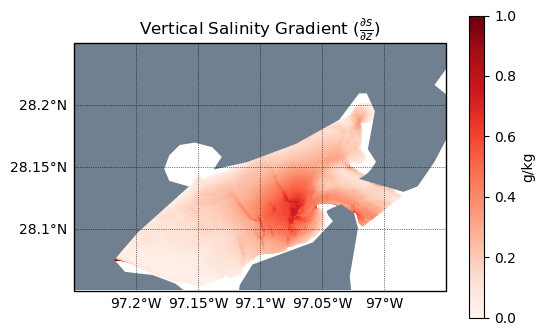

In [7]:
path = glob.glob('/home/dylan/monthly_dsdz/dsdz*.nc')

for filename in path[1:12]:
#     dsdz = get_dsdz(filename)
    test = xarray.open_dataarray(filename)
    
    fig = plt.figure(figsize=(6,4),dpi=100)
    fig.tight_layout()
    ax = fig.add_subplot(111, projection = p)
    make_map(fig, ax, xlocs, ylocs)
    ax.pcolormesh(ncgrd['lon_rho'], ncgrd['lat_rho'], test, cmap=plt.cm.get_cmap('Reds'),vmin=0, vmax=1, transform=ccrs.PlateCarree() )
    cbar=plt.colorbar(ax.pcolormesh(ncgrd['lon_rho'], ncgrd['lat_rho'], test, cmap=plt.cm.get_cmap('Reds'), vmin=0, vmax=1, label = 'g/kg', transform=ccrs.PlateCarree() ))
    cbar.set_label('g/kg')
    ax.set_title(r'Vertical Salinity Gradient ($\frac{\partial s}{\partial z}$)')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.text(-97.2, 28.1, calendar.month_name[int([filename[30:33]])], fontsize=12 )
    
#     plt.savefig('/home/dylan/monthly_dsdz/Figures/dsdz_'+mnts[filename[30:33]]+filename[-8:-2]+'png')
#     plt.close()

In [5]:
#Grid File
ncgrd = Dataset('/home/dylan/copano_bay_grd_g300_new2.nc')
Cs_w = ncgrd['Cs_w'][:]
Cs_r = ncgrd['Cs_r'][:]
sw = ncgrd['s_w'][:]
sr = ncgrd['s_rho'][:]
h = ncgrd['h'][:,:]
hc = 0.5
N = 20


FileNotFoundError: [Errno 2] No such file or directory: b'/home/dylan/copano_bay_grd_g300_new2.nc'

Preliminary Info for Salinity Variance and Gradient

In [ ]:
time = ds['ocean_time'][:]
salt_bar = []
salt_var = []
mask = (ncgrd['lon_rho'][:,:] >= -97.125)
dx = 1.0/ds['pm'][0].values * ~mask
dy = 1.0/ds['pn'][0].values * ~mask
zw = h[np.newaxis,:,:]*(hc*sw[:,np.newaxis,np.newaxis] + h[np.newaxis,:,:]*Cs_w[:,np.newaxis,np.newaxis])/(hc+h[np.newaxis,:,:], ) [0]
dz = np.diff(zw, axis=0)*~mask
dV = dx*dy*dz
volume = np.sum(dx * dy * dz)
salt_bar = []
salt_var = []

Salinity Variance for Half of the Bay (Depends on Mask)

In [ ]:
for tidx in range(len(time)):
    salt_east = nc['salt'][tidx,:,:,:] * ~mask
    salt_bar.append(np.sum(salt_east * dV ) / volume)
    salt_var.append(np.sum( (salt_east - salt_bar[tidx])**2 * dV)/volume )
# salt_var

df_new = pd.DataFrame({'salt_var': salt_var, 'gradient': np.gradient(salt_var), 'time':ds['ocean_time'][:]})
df_new.set_index('time')
df_new.to_csv('Salinity_Variance_Copano_West_-97125.csv')


In [ ]:
df = pd.read_csv('Salinity_Variance_Copano_West.csv', index_col=3, parse_dates=[3])
df1 = pd.read_csv('Salinity_Variance_Copano_East.csv', index_col=3, parse_dates=[3])
df2 = pd.read_csv('Total River Discharge Data Final.csv', index_col=0, parse_dates=True)
# s_west = df['salt_var'].mean()
# s_east = df1['salt_var'].mean()
# print(s_west)
# print(s_east)
# fig = plt.figure(figsize=(12, 6),dpi=300)
# fig.tight_layout()
# fig.subplots_adjust(hspace=.5)

# ax1 = plt.subplot(2,1,1)
# df['salt_var'].plot(color='b', label='Copano West')
# df1['salt_var'].plot(color='k',label='Copano East')
# ax1.set_ylabel('$(g/kg)^{2}$')
# ax1.set_title('Salinity Variance')
# ax1.set_xlabel('')
# ax1.set_xlim(['2010-1-1','2016-1-1'])
# ax1.set_ylim([0,60])
# ax1.legend()

# ax2 = plt.subplot(2,1,2)
# ax2 = df2['ComFlow']['2010-1-1':'2015-12-31'].plot()
# ax2.set_ylabel(' ($m^{3}s^{-1}$)')
# ax2.set_title('River Discharge')
# ax2.set_xlim(['2010-1-1','2016-1-1'])
# ax2.set_xlabel('')



In [ ]:
# mask = (ncgrd['lon_rho'][:,:] >= -97.1)
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111) #p es la proyeccion
ax.pcolormesh(ncgrd['lon_rho'], ncgrd['lat_rho'], ds['salt'][100,1,:,:]*mask)
cbar=plt.colorbar(ax.pcolormesh(ncgrd['lon_rho'], ncgrd['lat_rho'], ds['salt'][100,1,:,:]*mask))

In [ ]:
df = df.resample('10min').interpolate()
df = df[~df.index.duplicated()] 

df1 = df1[~df1.index.duplicated()]
df1 = df1.resample('10min').interpolate()



# cor_west = df['salt_var'].corr( df2['ComFlow']['2010-1-1':'2015-12-1 00:00:00'])
# cor_east = df1['salt_var'].corr( df2['ComFlow']['2010-1-1':'2015-12-1 00:00:00'])

# print(cor_west**2, 'R^2 Copano West')
# print(cor_east**2, 'R^2 Copano East')

In [ ]:
df = pd.read_csv('Salinity_Variance_Copano_West.csv', index_col=3, parse_dates=[3])
df1 = pd.read_csv('Salinity_Variance_Copano_East.csv', index_col=3, parse_dates=[3])
df2 = pd.read_csv('Total River Discharge Data Final.csv', index_col=0, parse_dates=True)

#Remove Phase Lag
lags = np.linspace(1,100,)
cor_west=[]
cor_east=[]
for lag in range(1,100):
    dfW = df.shift(-lag)
    dfE = df1.shift (-lag)
    dfR = df2.shift(lag)
    cor_west.append(dfW['salt_var'].corr( dfR['ComFlow']['2010-1-1':'2015-12-1 00:00:00']))
    cor_east.append(dfE['salt_var'].corr( dfR['ComFlow']['2010-1-1':'2015-12-1 00:00:00']))
cor_west = np.asarray(cor_west)
cor_east = np.asarray(cor_east)
cor_east.argmin()
print(cor_west.argmin(), 'Copano West Time step to Highest R Value')
print(cor_east.argmin(), 'Copano East Time step to Highest R Value')
print(cor_west.min(), 'R: Copano West')
print(cor_east.min(), 'R: Copano East')

    

In [ ]:
fig = plt.figure(figsize=(12, 6),dpi=300)
fig.tight_layout()
fig.subplots_adjust(hspace=.5)

ax1 = plt.subplot(2,1,1)
df['salt_var'].plot(color='b', label='Copano West')
df1['salt_var'].plot(color='k',label='Copano East')
ax1.set_ylabel('$(g/kg)^{2}$')
ax1.set_title('Salinity Variance')
ax1.set_xlabel('')
ax1.set_xlim(['2010-1-1','2016-1-1'])
ax1.set_ylim([0,60])
ax1.legend()

ax2 = plt.subplot(2,1,2)
ax2 = df2['ComFlow']['2010-1-1':'2015-12-1'].plot()
ax2.set_ylabel(' ($m^{3}s^{-1}$)')
ax2.set_title('River Discharge')
ax2.set_xlim(['2010-1-1','2016-1-1'])
ax2.set_xlabel('')



In [ ]:
dfsal = pd.read_csv('Salinity_Data.csv', index_col=0, parse_dates=[0])

fig = plt.figure(figsize=(12, 5),dpi=300)
fig.tight_layout()
fig.subplots_adjust(hspace=.5)

ax1 = plt.subplot(111)
dfsal['CopanoEast'].plot(color='b', label='CopanoEast')
dfsal['MARSCWQ'].plot(color='k',label='MARSCWQ')
dfsal['MARABWQ'].plot(color='m',label='MARABWQ')
ax1.set_ylabel('$(g/kg)$')
ax1.set_title('Salinity ')
ax1.set_xlabel('')
ax1.set_xlim(['2010-1-1','2016-1-1'])
ax1.set_ylim([0,60])
print(dfsal['CopanoEast'].mean())
print(dfsal['MARABWQ'].mean())
print(dfsal['MARSCWQ'].mean())

Normalize Salinity Concentrations

In [ ]:
dfsal = pd.read_csv('Salinity_Data.csv', index_col=0, parse_dates=[0])
dfsal = dfsal['Average']
dfsal = dfsal.replace(0,dfsal.mean())
dfsal = dfsal['2010-1-1':'2015-12-1']
dfsal = dfsal[~dfsal.index.duplicated()] 
dfsal = dfsal.resample('120min').interpolate()

time = netcdf.num2date(nc['ocean_time'][:], nc['ocean_time'].units)
mask = nc['mask_rho'][:]
dx = 1.0/nc['pm'][:] * mask
dy = 1.0/nc['pn'][:] * mask
zw = octant.roms.nc_depths(nc, 'w')
dz = np.diff(-zw[0], axis=0)* mask
dV = dx*dy*dz
volume = np.sum(dx * dy * dz) 


In [ ]:
#print(time)
salt_bari = []
sigma = []
salt = []
mask = nc['mask_rho'][:]
dx = 1.0/nc['pm'][:] * mask
dy = 1.0/nc['pn'][:] * mask
time = netcdf.num2date(nc['ocean_time'][:], nc['ocean_time'].units)
for tidx in range(len(time[:20])):
    zw = h[np.newaxis,:,:]*(hc*sw[:,np.newaxis,np.newaxis] + h[np.newaxis,:,:]*\
                    Cs_w[:,np.newaxis,np.newaxis])/(hc+h[np.newaxis,:,:])
    dz = np.diff(-zw, axis=0) * mask
    volume = np.sum(dx * dy * dz)
    salt = nc['salt'][tidx] * mask
    salt_bari = np.array(np.sum(salt[:,:] * dx * dy * dz) / volume)
    salt_bari = salt_bari.append(salt_bari)
#     sigma = np.array((salt_bari/dfsal[tidx]) )
#     sigma = sigma.append(sigma)
df_new = pd.DataFrame({'salt_bari': salt_bari, 'time':time[:20]})
df_new.set_index('time')
df_new.to_csv('Normalized_Salinity.csv')
    

In [ ]:
salt_bari

In [ ]:
def normalized_salinity(nc, tidx):
    salt = nc['salt'][tidx,:,:,:] * mask
    s_avg = np.sum(salt * dx * dy * dz) / volume
    sigma = ((s_avg/dfsal[tidx]) )
    return s_avg,sigma


In [ ]:
salt = []
s_avg= []
sdbar = []
sigma = []


for tidx in range(len(time[:10])):
    try:
        sigma.append(normalized_salinity(nc, tidx))
        s_avg.append(normalized_salinity(nc, tidx))
    except:
        df_new = pd.DataFrame({'sigma': sigma, 'time':time})
        df_new.set_index('time')
        df_new.to_csv('Normalized_Salinity.csv')
sigma = np.nan_to_num(sigma)
s_avg
# df_new = pd.DataFrame({'s_avg': s_avg,'sigma': sigma, 'time':time[:10]})
# df_new.set_index('time')
# df_new.to_csv('Normalized_Salinity.csv')

In [ ]:
len(s_avg)

In [ ]:
fig = plt.figure(figsize=(8,2),dpi=300)
fig.tight_layout()
fig.subplots_adjust(hspace=.5)
ax = plt.subplot(111)
ax.plot(time[:25879],sigma,color='k')
plt.title('Normalized Salinity')

In [ ]:
sigma = np.array(sigma[1:])
sigma.mean()

In [ ]:
df = pd.read_csv('/home/dylan/Normalized_Salinity.csv', index_col=2, parse_dates=True)
fig = plt.figure(figsize=(4,3),dpi=100)
fig.tight_layout()
fig.subplots_adjust(hspace=.5)
ax = plt.subplot(111)
df['sigma'].plot(color='b', label='Copano West')



In [ ]:
len(sigma)